**1.softmax如何防止指数上溢和下溢**    
如果有一个input是很大的正数，那么这个input的exp将可能指数上溢；同理，如果输入是一个非常小的负数，那么这个input的exp将会非常接近0，softmat的分母为0，结果就会报错       

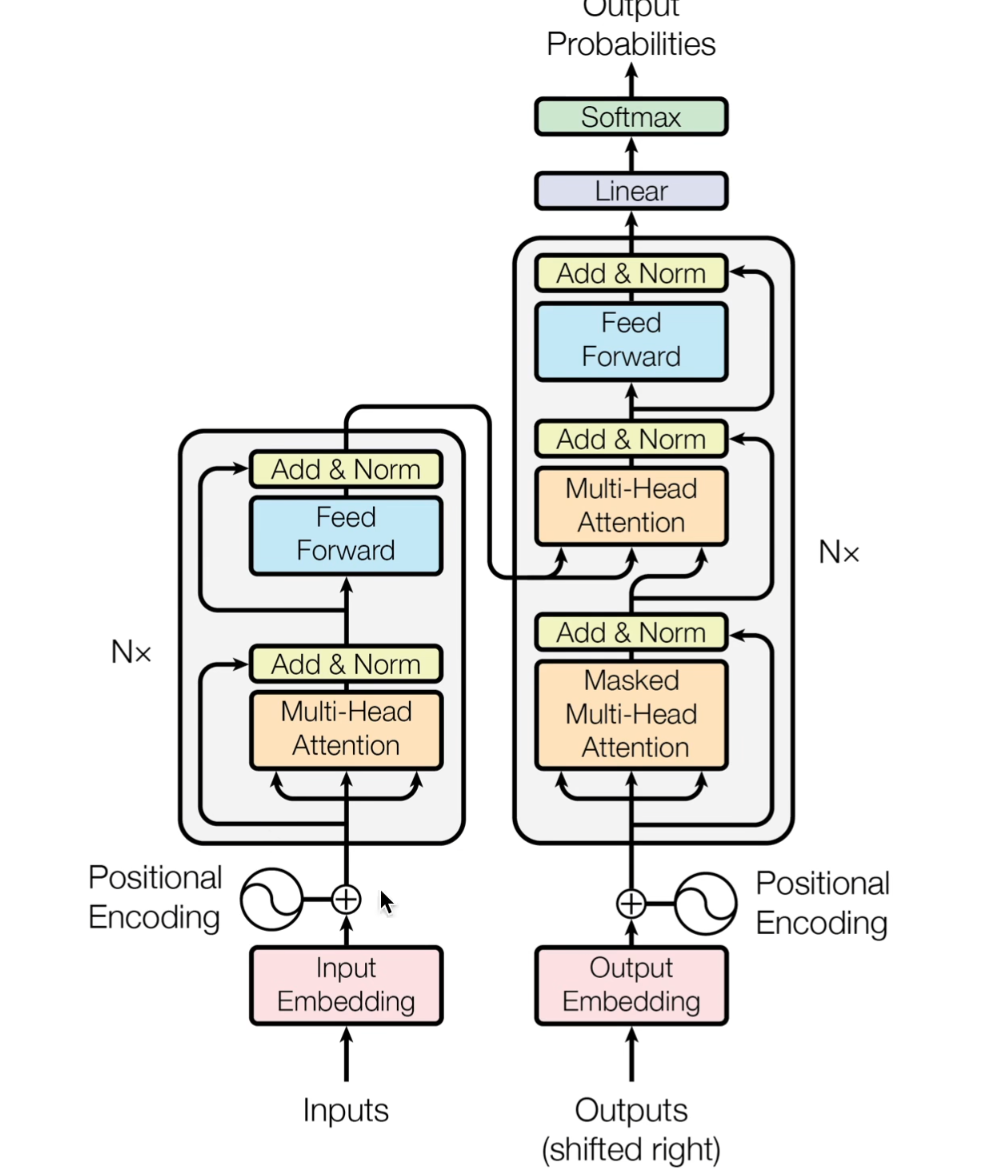

**2.为什么是多头？**：    
因为使得建模能力更强，表征空间更丰富     
由多组QKV构成，每组单独计算一个attention向量    
把每组的attention向量拼接起来，并进入一个不带bias的FFN得到最终的向量

torch.nn.Transformer

In [1]:
import torch
from torch import nn

In [ ]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads, bias, dropout=0.0):
        super().__init__()
        assert d_model % num_heads == 0
        
        self.d_model = d_model
        self.num_heads = num_heads
        self.d_k = d_model // num_heads #计算每个头的维度
        
        self.w_q = nn.Linear(d_model, d_model, bias=bias)
        self.w_k = nn.Linear(d_model, d_model, bias=bias)
        self.w_v = nn.Linear(d_model, d_model, bias=bias)

        